## Intro to Scikit-Learn 
### 1.LINEAR REGRESSION

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [1]:

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* rows of a matrix = samples 
* no. of rows = n_samples
* columns of matrix = features
* no. of columns = n_features

For models we usually work with :
* Feature Matrix = X and has shape (n_samples, n_features)
* Target Array = y. usually one dimensional and contained in numpy array or pandas series
y is what we want to predict( the dependent varirable)

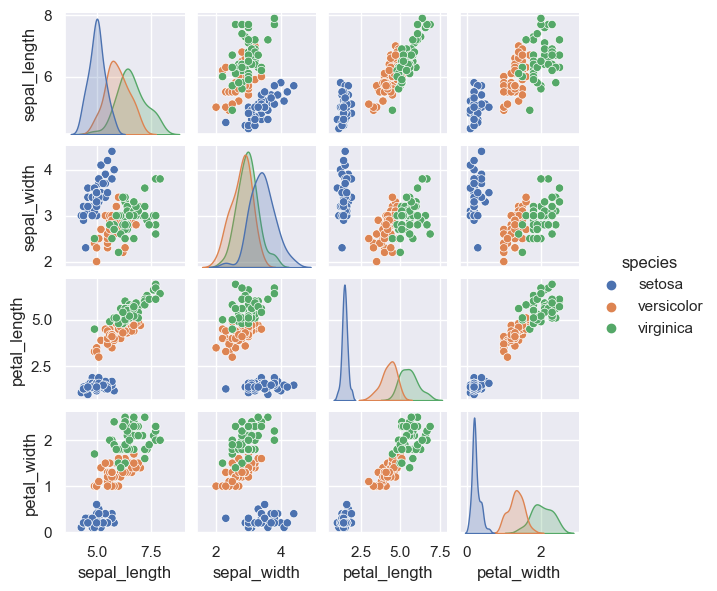

In [2]:
# if y = specieis, we can then visualize the data with seaborn

%matplotlib inline
sns.set()
sns.pairplot(iris,hue="species", height=1.5)
plt.show()

To use Scikit-learn, we extract X and y from array

In [3]:
X_iris = iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

#### Bsics of the API (Scikit-Learn)
1. Choose a class of model by importing appropriate estimator class from Scikit-Learn
2. Choose model hyperparameters by instantiating this class with desired values
3. Arrange data into features matrix and target vector 
4. Fit model to data by calling the fit() method of the model instance
5. Apply the Model to new data
    * for SML: predict lables for unknown data using the predict() method
    * for UML: transform or infer propoerties of the data using the transform() or predict() method

##### Linear Regression

- we use random generate data for this example

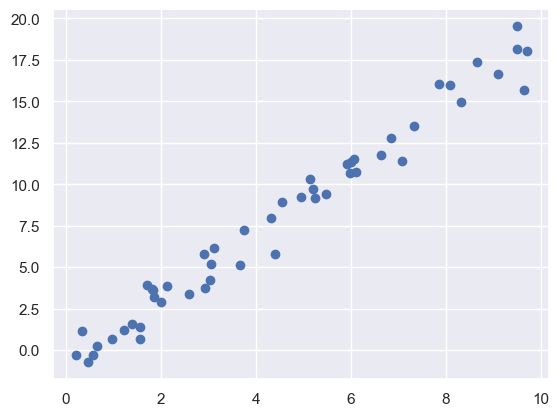

In [12]:
rng= np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x -1 + rng.randn(50)
plt.scatter(x,y)

**1.Choose class of model**

In [13]:
from sklearn.linear_model import LinearRegression

**2.Choose model hyperparameters** \
Depending on the model we are working with, we might need to answer one or more questions such as:\
* Would we like to fit for the offset(i.e. y-intercept)?
* Would be like the model to be normalized?
* Would we like to preprocess our features to add model flexibility?
* What degree of regularization would we like to use in our model?
* How many model components would we like to use?

These choices are often rerpesented as *hyperparameters*, or parameters that must be set before the model is fit to data

In [17]:
# for the linear regression we can specify hyperparamethers to the method
model = LinearRegression(fit_intercept=True)
model
# this is the choice of model and not its application yet

LinearRegression()

**3. Arrage data into features matrix and target vector**


In [26]:
# the random data generated already has y as a array of one dimension
# x is also an array of one dimension so we need to shift it into one of multiple dimensions (n_samples,n_features)
X=x[:,np.newaxis]
X.shape
# np.newaxis simply increases the dimenison of th array, since it is placed on the columns side of the array then it increases the columns

(50, 1)

**4.Fit the model to your data** \
a no of model-dependednt internal computations take place ant their result are stored in model-specific attributes
e.g. for this model below

In [27]:
model.fit(X,y)

LinearRegression()

In [28]:
# slope
model.coef_

array([1.9776566])

In [29]:
# intercept
model.intercept_

-0.903310725531111

the slope is very closed to the slope of 2 we gave when defining y, and the intercept is also very close to intercept of -1 we gave when defining y

**5. Predict labels for unknown data**

In [35]:
# for these example our new data will be a grid of x values and we will ask what y values the model predicts
xfit = np.linspace(-1,11)
# again we need a matrix of shape (n_samples, n_features) so we need to coerce
Xfit = xfit[:,np.newaxis]
yfit=model.predict(Xfit)

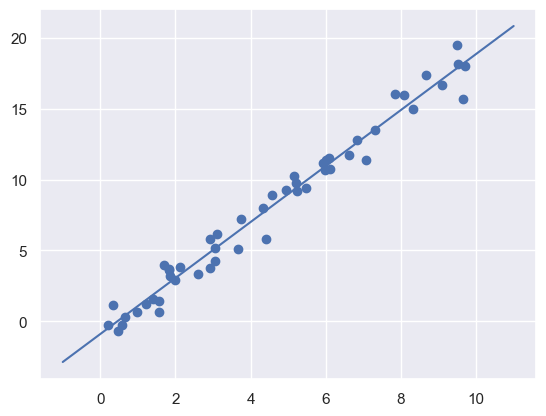

In [38]:
# visualizing the restults
plt.scatter(x,y) #test values
plt.plot(xfit,yfit) #predicted values

**Evaluate Model**

There are 3 main measures for evaluation of REGRESSION:
1. R Square/ Adjusted R Square
- square of the Correlation Coefficient(R) \
= sum of squared prediction error divided by total sum of the square which replaces the calculated prediction with mean
- value is between 0 to 1 and the bigger value indicates a better fit between prediction and actual value

Note: it is a good measur to determine how well the model fits the dependent variables but  <mark> does not take overfitting problem into consideration </mark>
To adjust for overfitting we use <mark> $R^2$ adjusted </mark>. If they are more or less the same it means the model does not overfit


2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
- MSE is an absolute measure of the goodness for the fit \
= calculated by the sum of square of prediction error( which is real output minus predicted output) then diveded by the no of data points.
- you cannot interpret many insights from one result but it gives a real no to compare against other model results and help you select the best regression model
- the lower the value the better , 0 means the model is perfect
<br></br>
- RMSE is squared root of MSE
- it is more often used as MSE can be too big to compare easily
- as MSE is calculated as square of error taking its sqrt brings it back to the same level of prediction error

3. Mean Absolute Error(MAE)
- similar to MSE but takes the sume of the absolute value of error


More info: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

In [44]:
# see r sqared of model. if we use xfit and yfit then ofc we get 0 ... so we need the intitial data
model.score(X,y)

0.9749140085676858

In [47]:
# MSE and RMSE
from sklearn.metrics import mean_squared_error
import math
MSE=(mean_squared_error(y, yfit))
RMSE=(math.sqrt(mean_squared_error(y, yfit)))

In [48]:
MSE

87.04102889045714

In [49]:
RMSE

9.329578173232546

???***The Ordinary Least Sqares***?

***Benefits of Linear Regression***
1. Ease of use
2. Interpretability
3. Scalability: not computationaly heavy
4. Performs well in online settings

***Other predictive models***
1. Simple & multiple regression
2. Polynomial regression
3. Ridge regression and Lasso regression (upgrades to linear regression)
4. Decision Trees
5. Support Vector Machines

#### *Other Resoruces*
* https://medium.com/analytics-vidhya/everything-you-need-to-know-about-linear-regression-750a69a0ea50
* https://elleknowsmachines.com/diy-simple-linear-regression/
* https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
* https://www.keboola.com/blog/linear-regression-machine-learning